In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading and Preprocessing (5 marks)
* Load the dataset and perform necessary preprocessing steps.

In [3]:
#Loading the dataset
data=pd.read_csv(r"C:\Users\anjan\Downloads\CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
# Since our aim is to find the important features affecting the price of the car, dropping the "car_id","carname" columns.
data=data.drop(columns=["car_ID","CarName"],axis=1)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [6]:
data.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

data do not contain any null values

In [8]:
data.duplicated().sum()

1

In [9]:
# to remove the  duplicates
data=data.drop_duplicates()
data.duplicated().sum()

0

In [10]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.833333,98.781373,174.131373,65.918137,53.740196,2558.450980,127.088235,3.331520,3.255539,10.146176,104.294118,5123.284314,25.191176,30.715686,13311.258172
std,1.248316,6.026096,12.311367,2.145361,2.439646,520.315831,41.664294,0.270328,0.314363,3.981469,39.559916,477.431033,6.545613,6.884519,7993.139194
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.100000,52.000000,2163.000000,97.750000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7796.250000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10320.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16506.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


some of the columns have difference in mean and median values.which indicates the presence of outliers. 

In [12]:
#To find the skewness of the data
numericals=data.select_dtypes("number")
skewness=numericals.skew()
skewness

symboling           0.212554
wheelbase           1.043647
carlength           0.150043
carwidth            0.898427
carheight           0.055171
curbweight          0.676628
enginesize          1.944603
boreratio           0.012334
stroke             -0.689277
compressionratio    2.602516
horsepower          1.400842
peakrpm             0.084574
citympg             0.675634
highwaympg          0.552969
price               1.773964
dtype: float64

From the skewness values, we can see some features(wheelbase,enginesize,compressionratio,horsepower etc) are highly possitively skewed.

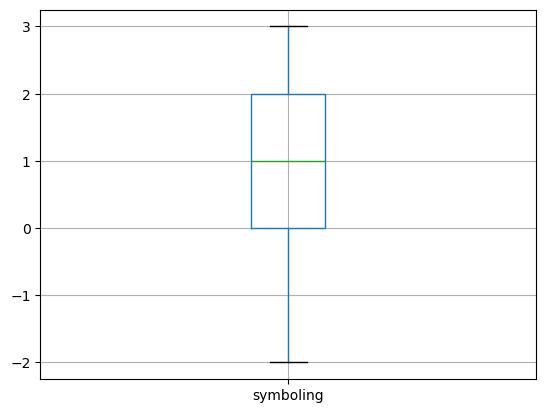

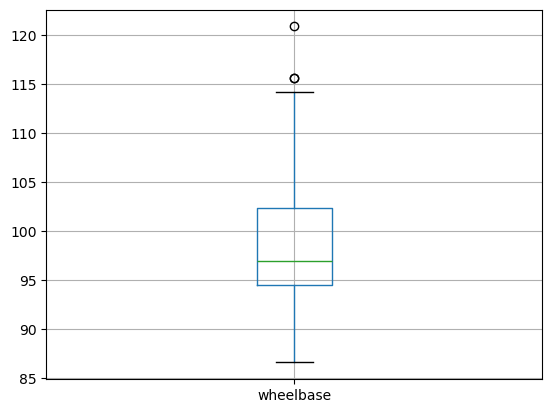

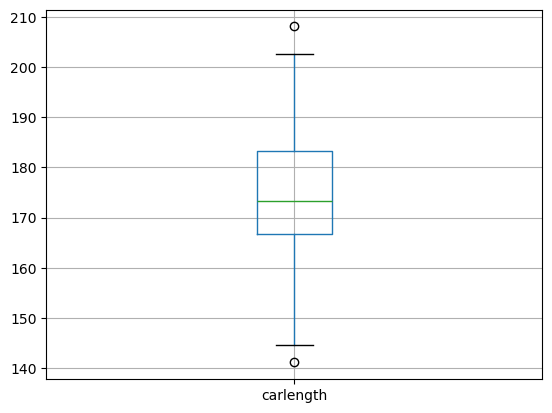

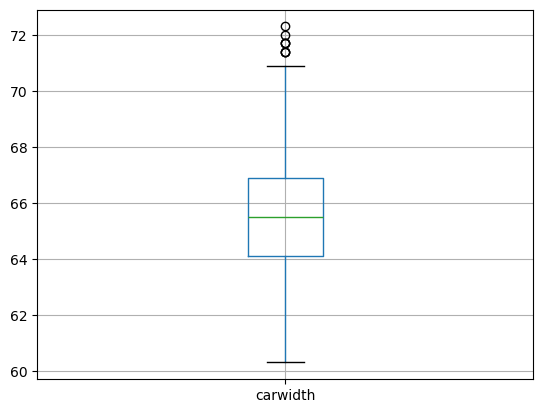

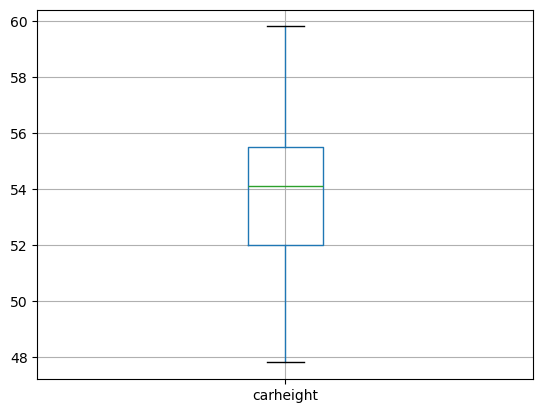

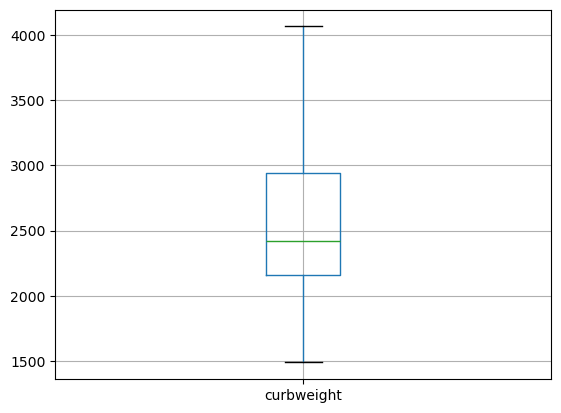

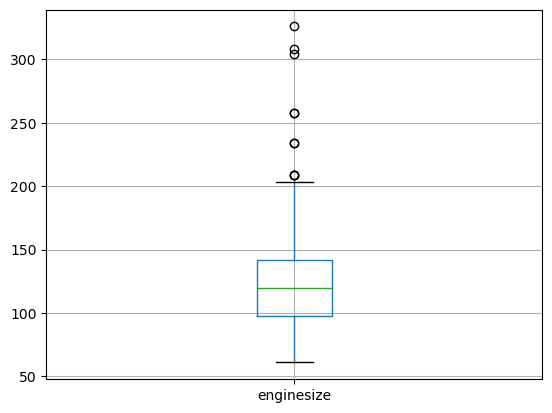

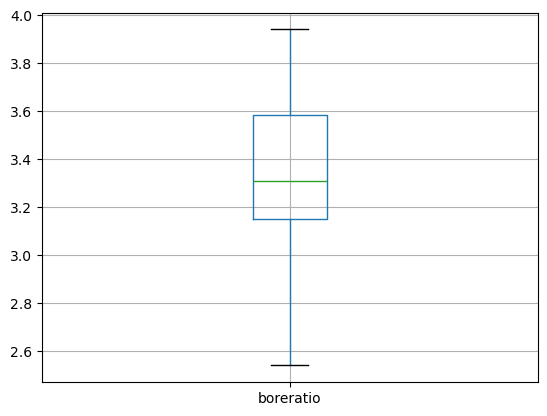

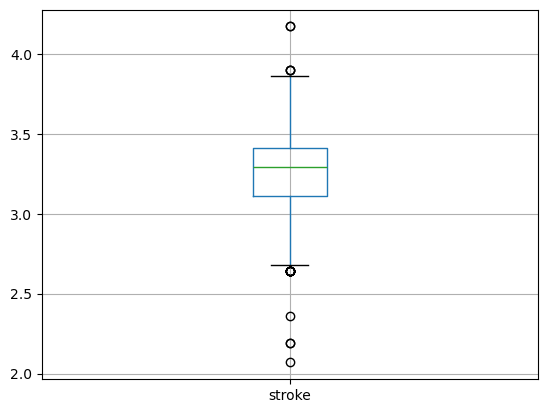

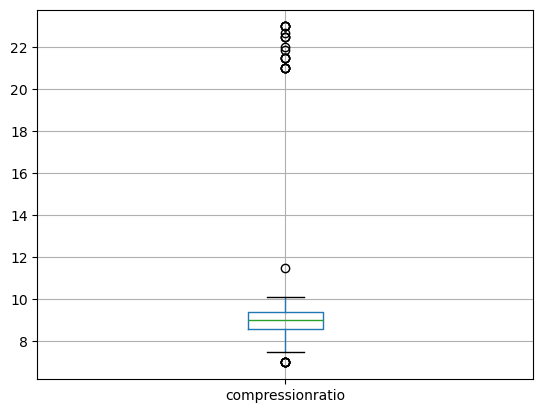

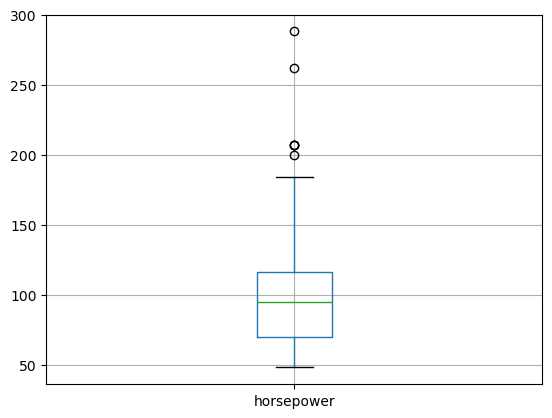

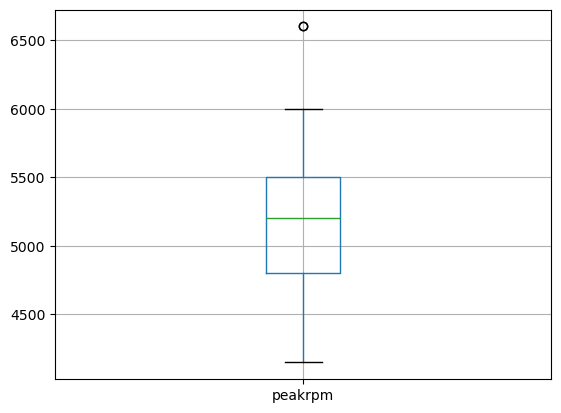

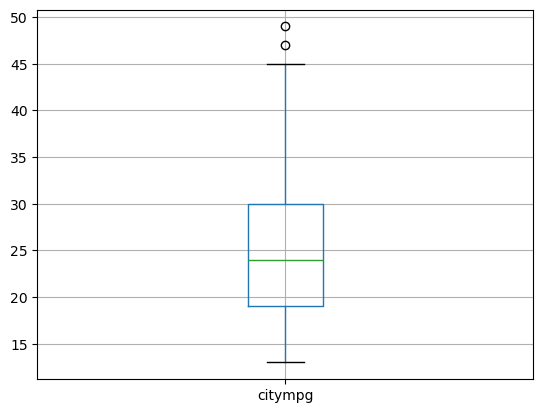

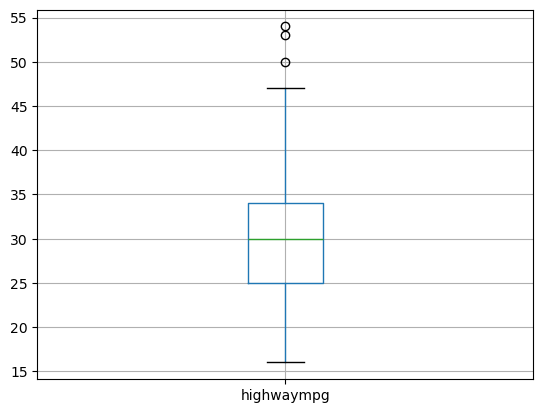

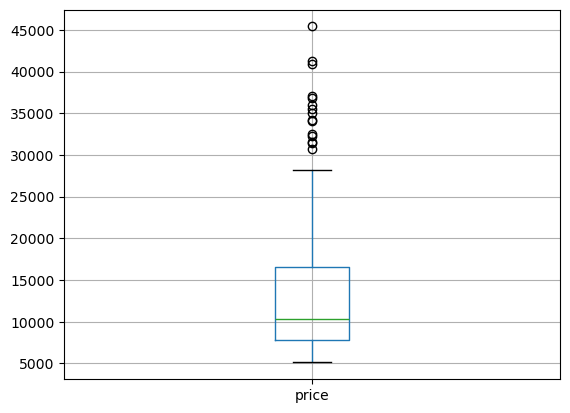

In [14]:
#Visually representing the outliers using boxplot
numericals=data.select_dtypes("number")
for column in numericals:
    numericals.boxplot(column)
    plt.show()

The outliers are visible ithe boxplot.

In [16]:
# Finding the outliers using IQR method.
def finding_outliers_iqr(data):
    numericals=data.select_dtypes("number")
    outliers={}  
    for column in numericals:
        Q1= numericals[column].quantile(0.25)
        Q3= numericals[column].quantile(0.75)
        IQR=Q3-Q1
        lower_whisker=Q1-1.5*IQR
        upper_whisker=Q3 + 1.5*IQR
        outliers[column]=data[(numericals[column] < lower_whisker) | (numericals[column] > upper_whisker)]
    return outliers


outliers_dict=finding_outliers_iqr(data)
for column, outliers in outliers_dict.items():
    print("outliers in",column,":",outliers)

outliers in symboling : Empty DataFrame
Columns: [symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 24 columns]
outliers in wheelbase :     symboling fueltype aspiration doornumber carbody drivewheel  \
70         -1   diesel      turbo       four   sedan        rwd   
71         -1      gas        std       four   sedan        rwd   
73          0      gas        std       four   sedan        rwd   

   enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
70          front      115.6      202.6      71.7  ...         183   
71          front      115.6      202.6      71.7  ...         234   
73          front      120.9      208.1      71.7  ...         308   

    fuelsystem boreratio stroke  compressionratio horsepower  peakrp

In [17]:
# capping the outliers
def capping_outliers(data):
    numericals=data.select_dtypes("number")
    data_capped=data.copy()
    for column in numericals:
        Q1= numericals[column].quantile(0.25)
        Q3= numericals[column].quantile(0.75)
        IQR=Q3-Q1
        lower_whisker=Q1-1.5*IQR
        upper_whisker=Q3 + 1.5*IQR
        data_capped[column]=data[column].apply (lambda x:lower_whisker if x < lower_whisker else upper_whisker if x > upper_whisker else x)
    return data_capped

data_capped=capping_outliers(data)
data_capped

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.47,2.68,9.0000,111.0,5000.0,21.0,27.0,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.47,2.68,9.0000,111.0,5000.0,21.0,27.0,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152.0,mpfi,2.68,3.47,9.0000,154.0,5000.0,19.0,26.0,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109.0,mpfi,3.19,3.40,10.0000,102.0,5500.0,24.0,30.0,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136.0,mpfi,3.19,3.40,8.0000,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141.0,mpfi,3.78,3.15,9.5000,114.0,5400.0,23.0,28.0,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141.0,mpfi,3.78,3.15,8.7000,160.0,5300.0,19.0,25.0,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173.0,mpfi,3.58,2.87,8.8000,134.0,5500.0,18.0,23.0,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145.0,idi,3.01,3.40,10.6375,106.0,4800.0,26.0,27.0,22470.0


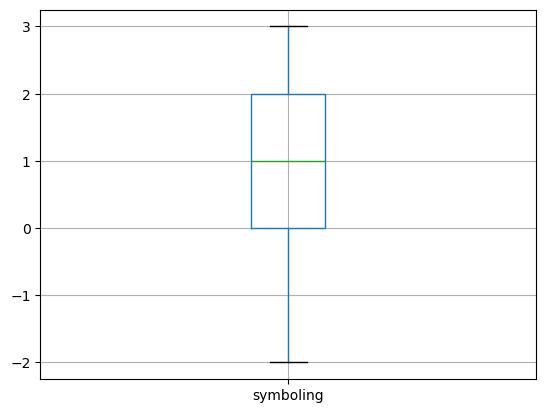

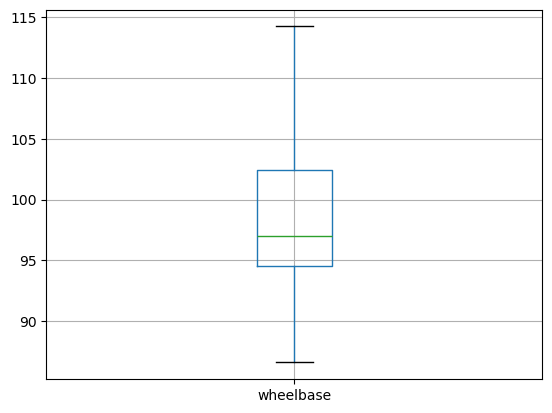

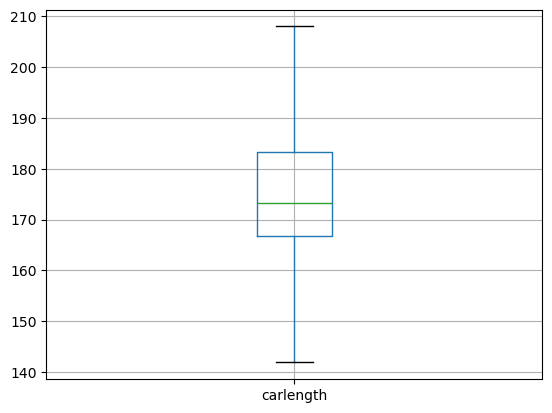

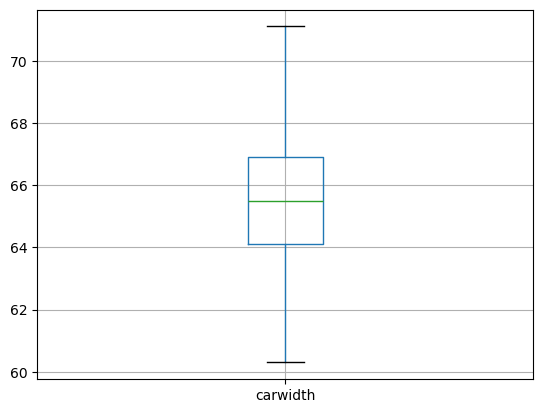

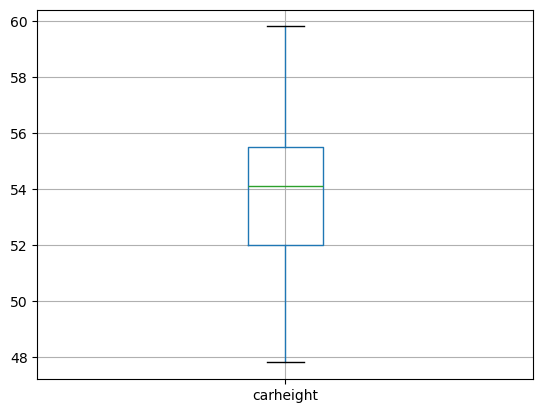

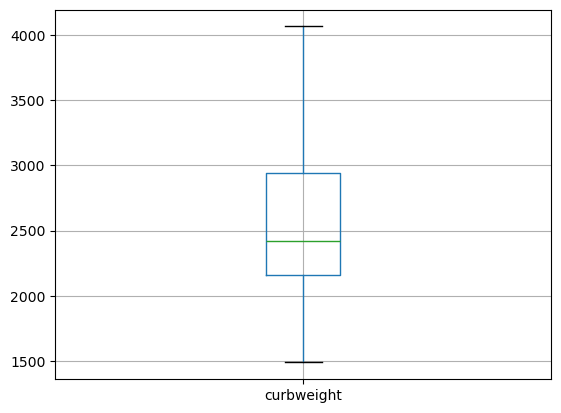

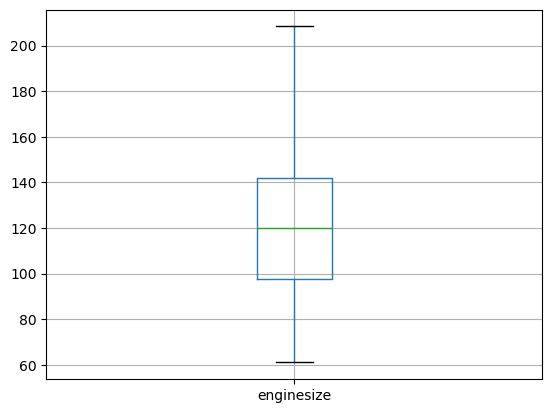

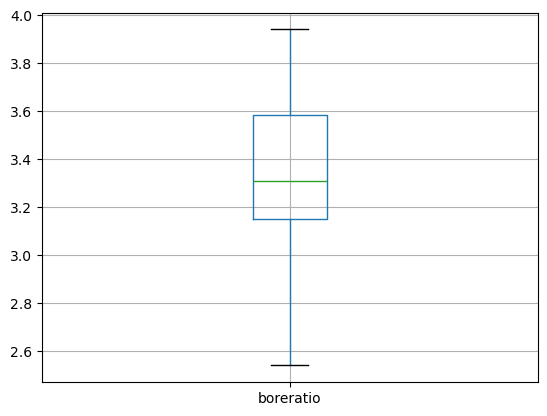

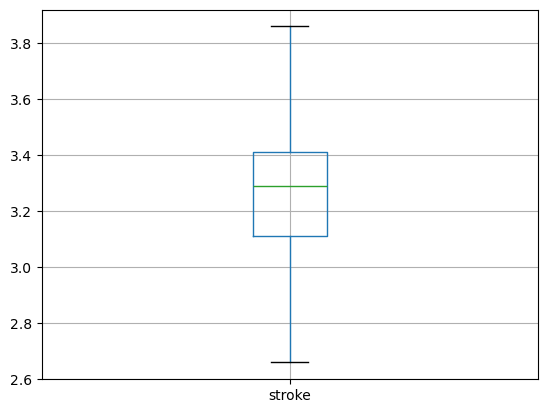

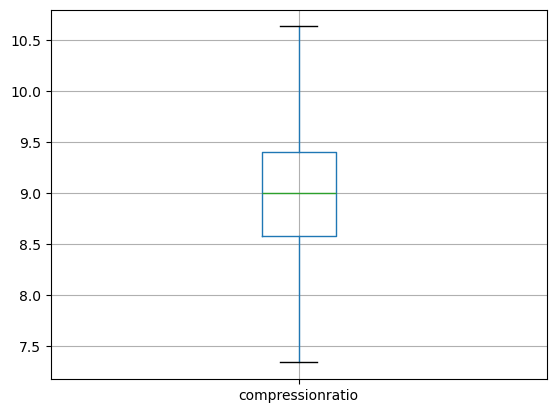

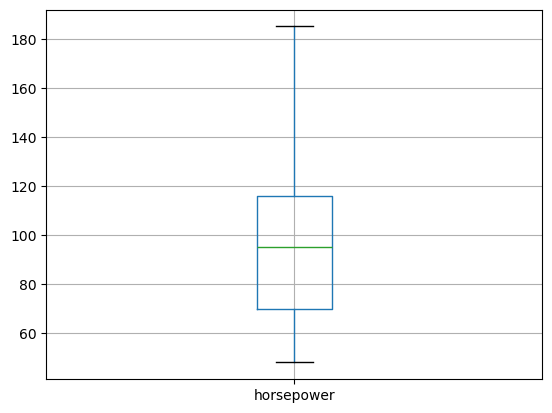

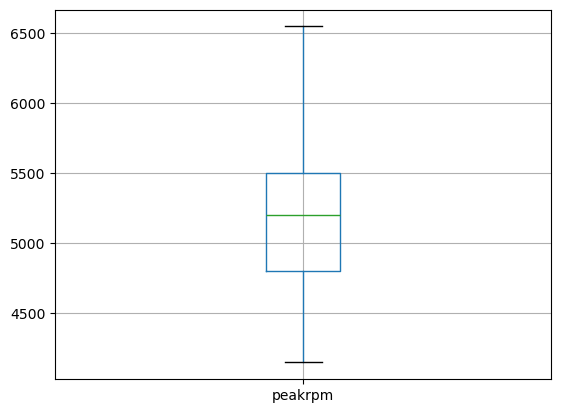

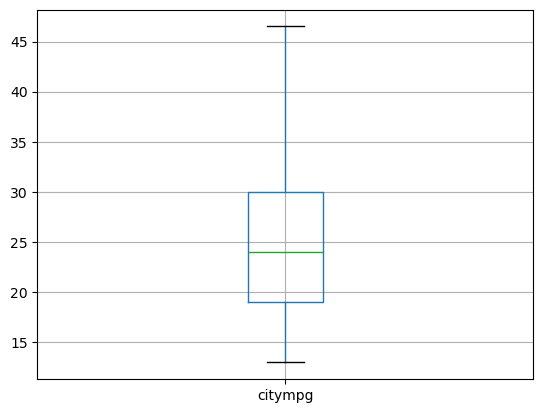

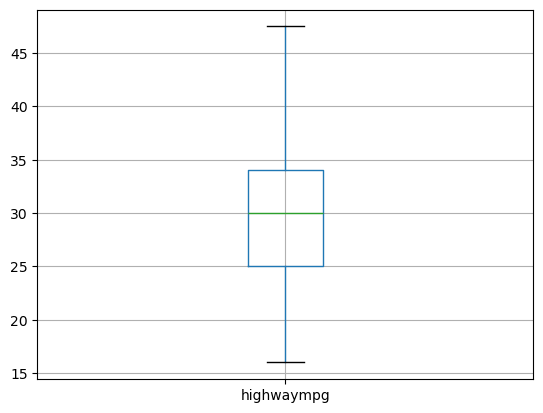

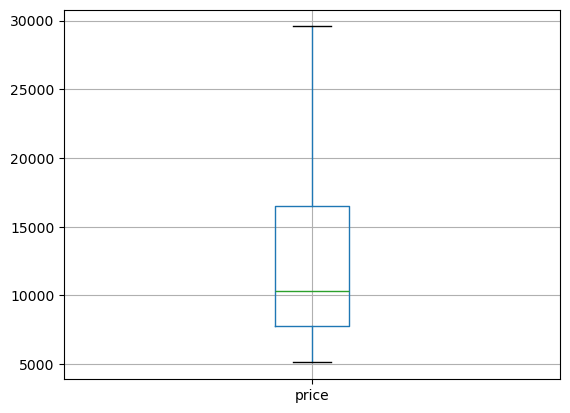

In [18]:
# checking the capped_data visually for outliers.
numericals=data_capped.select_dtypes("number")
for column in numericals:
    numericals.boxplot(column)
    plt.show()

Outliers are capped properly.

In [20]:
#checking the skewness of the capped data
numericals=data_capped.select_dtypes("number")
skewness=numericals.skew()
skewness

symboling           0.212554
wheelbase           0.918086
carlength           0.155352
carwidth            0.770298
carheight           0.055171
curbweight          0.676628
enginesize          0.919859
boreratio           0.012334
stroke             -0.379950
compressionratio    0.054443
horsepower          0.808920
peakrpm             0.059318
citympg             0.616426
highwaympg          0.359429
price               1.217617
dtype: float64

The data is still skewed(skewness is greater than 0.5). we have to apply transformation technique to the data.

In [22]:
# Apply transformations
data_transformed=data_capped.copy()
for col in skewness.index:
    if skewness[col] > 0.5:  # Positively skewed
        data_transformed[col] = np.log1p(data_capped[col])
    elif skewness[col] < -0.5:  # Negatively skewed
        data_transformed[col] = np.square(data_capped[col])


In [23]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         204 non-null    int64  
 1   fueltype          204 non-null    object 
 2   aspiration        204 non-null    object 
 3   doornumber        204 non-null    object 
 4   carbody           204 non-null    object 
 5   drivewheel        204 non-null    object 
 6   enginelocation    204 non-null    object 
 7   wheelbase         204 non-null    float64
 8   carlength         204 non-null    float64
 9   carwidth          204 non-null    float64
 10  carheight         204 non-null    float64
 11  curbweight        204 non-null    float64
 12  enginetype        204 non-null    object 
 13  cylindernumber    204 non-null    object 
 14  enginesize        204 non-null    float64
 15  fuelsystem        204 non-null    object 
 16  boreratio         204 non-null    float64
 17  st

In [24]:
numericals=data_transformed.select_dtypes("number")
skewness=numericals.skew()
skewness

symboling           0.212554
wheelbase           0.776233
carlength           0.155352
carwidth            0.691234
carheight           0.055171
curbweight          0.263546
enginesize          0.409242
boreratio           0.012334
stroke             -0.379950
compressionratio    0.054443
horsepower          0.284680
peakrpm             0.059318
citympg             0.014553
highwaympg          0.359429
price               0.454969
dtype: float64

In [25]:
# finding the correlation between features.
corr=data_transformed.select_dtypes("number").corr()
corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.542284,-0.358386,-0.234559,-0.542412,-0.216358,-0.125007,-0.129751,0.006636,-0.075126,0.047771,0.274243,-0.055326,0.026539,-0.092888
wheelbase,-0.542284,1.000000,0.876824,0.795901,0.595877,0.762195,0.570558,0.486149,0.190203,0.015120,0.430919,-0.356999,-0.470836,-0.537663,0.626969
carlength,-0.358386,0.876824,1.000000,0.849220,0.486990,0.888119,0.727258,0.602938,0.150484,-0.056958,0.632907,-0.284374,-0.670260,-0.700452,0.771874
carwidth,-0.234559,0.795901,0.849220,1.000000,0.278513,0.866124,0.745696,0.563494,0.208310,-0.036835,0.668706,-0.220849,-0.674886,-0.686634,0.805062
carheight,-0.542412,0.595877,0.486990,0.278513,1.000000,0.296054,0.134084,0.164077,-0.027386,0.132030,-0.054573,-0.317737,-0.017308,-0.098434,0.166898
curbweight,-0.216358,0.762195,0.888119,0.866124,0.296054,1.000000,0.865521,0.667622,0.170603,-0.110374,0.798945,-0.253878,-0.803384,-0.820183,0.895839
enginesize,-0.125007,0.570558,0.727258,0.745696,0.134084,0.865521,1.000000,0.651261,0.232853,-0.126155,0.816096,-0.267326,-0.710088,-0.700730,0.832963
boreratio,-0.129751,0.486149,0.602938,0.563494,0.164077,0.667622,0.651261,1.000000,-0.090626,-0.104963,0.605595,-0.251750,-0.576381,-0.586128,0.609207
stroke,0.006636,0.190203,0.150484,0.208310,-0.027386,0.170603,0.232853,-0.090626,1.000000,-0.047739,0.125010,-0.074409,-0.043565,-0.048617,0.098912
compressionratio,-0.075126,0.015120,-0.056958,-0.036835,0.132030,-0.110374,-0.126155,-0.104963,-0.047739,1.000000,-0.381822,-0.186396,0.458363,0.433412,-0.083082


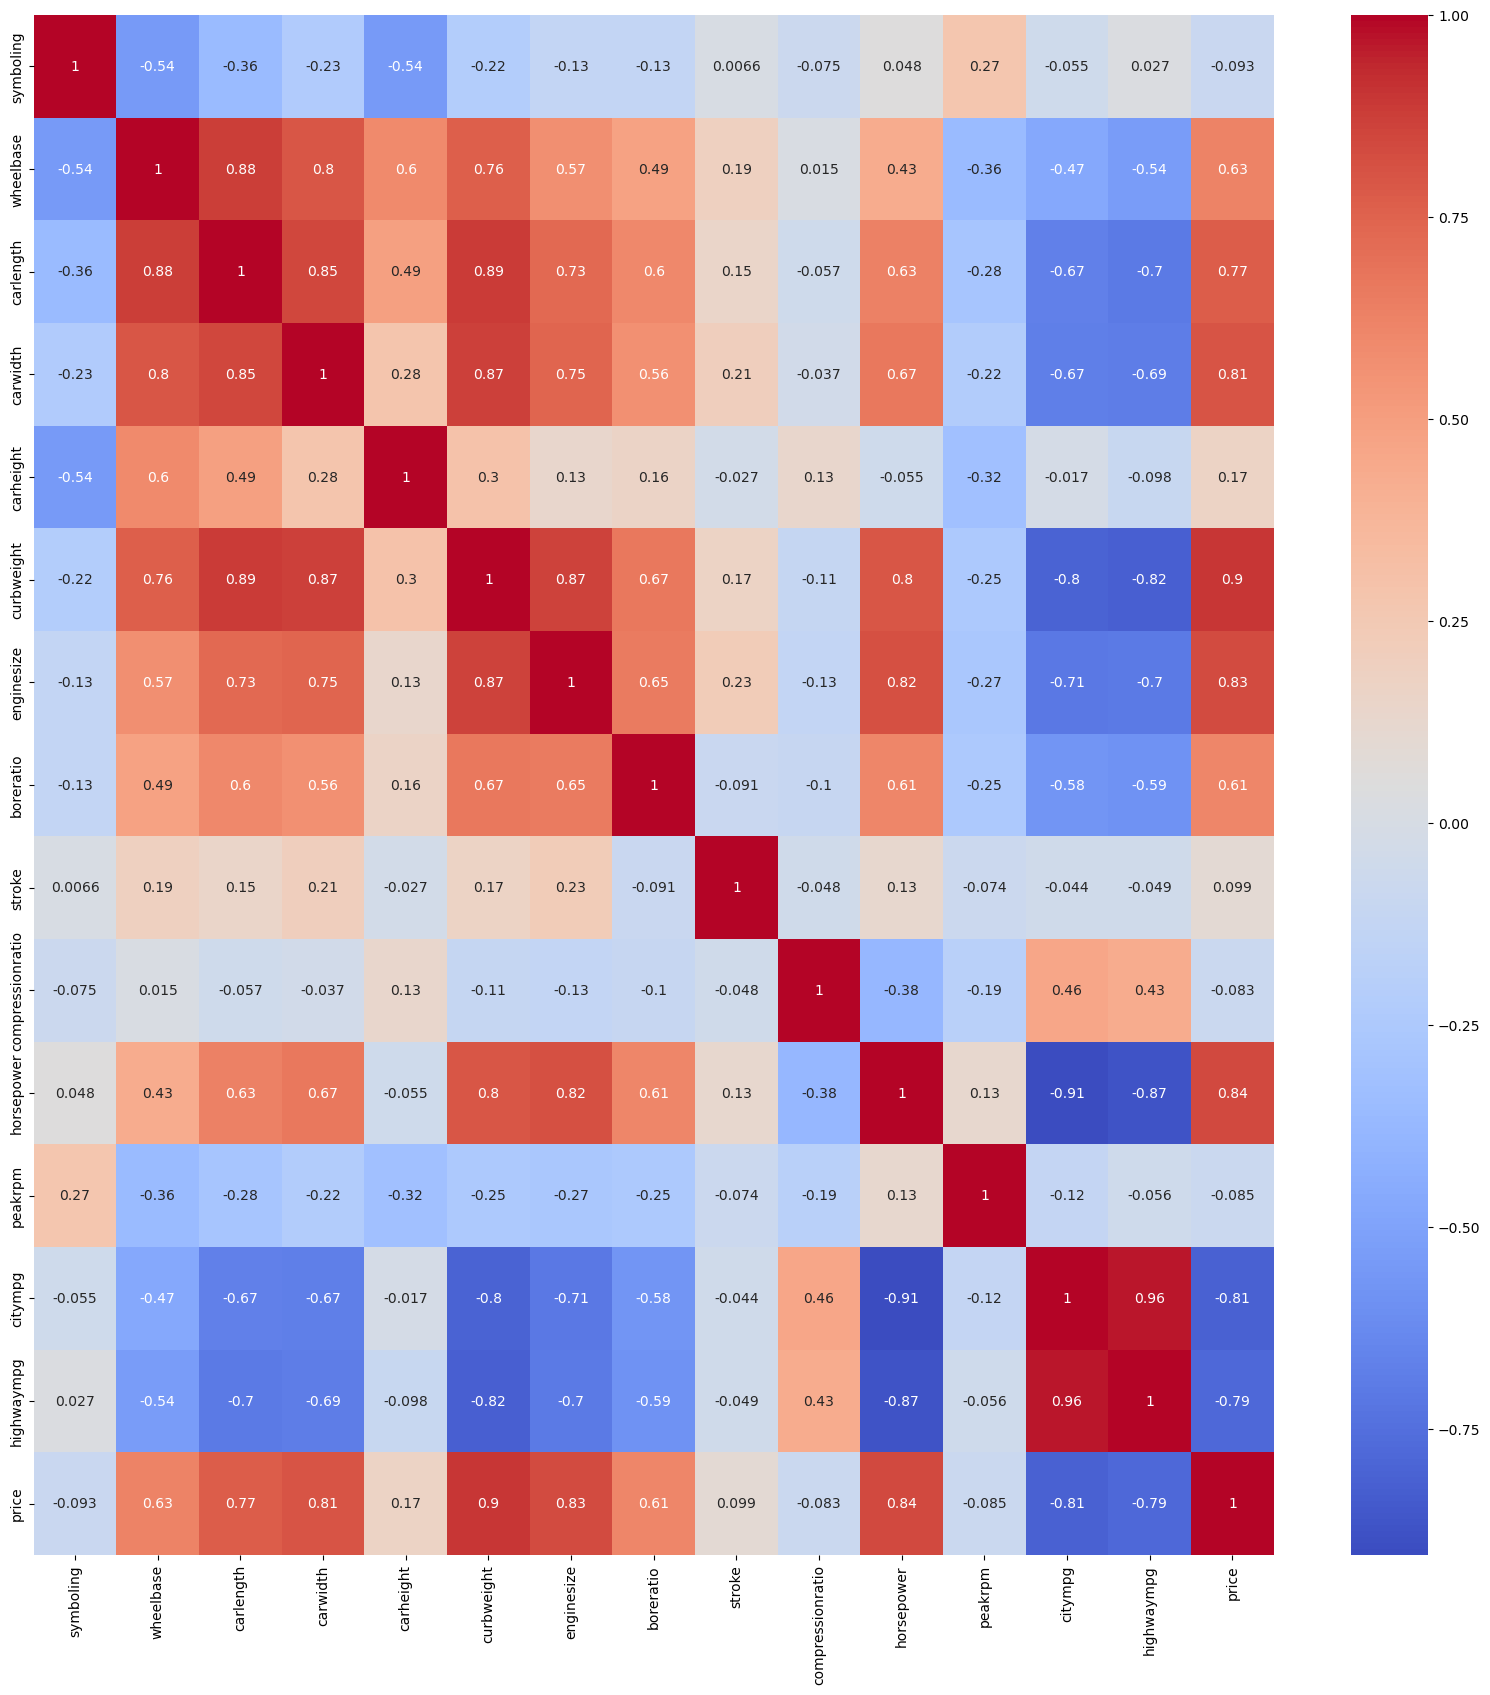

In [26]:
# visually representing the correlation using a heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

some features are highly correlated each other.

In [28]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
# encoding the categorical columns using onehotencoder
encode=OneHotEncoder()
data_encoded=pd.get_dummies(data_transformed,drop_first=True,dtype="int")
data_encoded

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,4.495355,168.8,4.175925,48.8,7.843456,4.875197,3.47,2.68,9.0000,...,0,0,0,0,0,0,0,1,0,0
1,3,4.495355,168.8,4.175925,48.8,7.843456,4.875197,3.47,2.68,9.0000,...,0,0,0,0,0,0,0,1,0,0
2,1,4.559126,171.2,4.197202,52.4,7.945910,5.030438,2.68,3.47,9.0000,...,0,0,0,0,0,0,0,1,0,0
3,2,4.613138,176.6,4.207673,54.3,7.757051,4.700480,3.19,3.40,10.0000,...,0,0,0,0,0,0,0,1,0,0
4,2,4.609162,176.6,4.210645,54.3,7.946264,4.919981,3.19,3.40,8.0000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.701389,188.8,4.247066,55.5,7.990577,4.955827,3.78,3.15,9.5000,...,0,0,0,0,0,0,0,1,0,0
201,-1,4.701389,188.8,4.245634,55.5,8.022897,4.955827,3.78,3.15,8.7000,...,0,0,0,0,0,0,0,1,0,0
202,-1,4.701389,188.8,4.247066,55.5,8.010692,5.159055,3.58,2.87,8.8000,...,0,0,0,0,0,0,0,1,0,0
203,-1,4.701389,188.8,4.247066,55.5,8.076515,4.983607,3.01,3.40,10.6375,...,0,0,0,0,0,1,0,0,0,0


In [30]:
X=data_encoded.drop("price",axis=1)
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,4.495355,168.8,4.175925,48.8,7.843456,4.875197,3.47,2.68,9.0000,...,0,0,0,0,0,0,0,1,0,0
1,3,4.495355,168.8,4.175925,48.8,7.843456,4.875197,3.47,2.68,9.0000,...,0,0,0,0,0,0,0,1,0,0
2,1,4.559126,171.2,4.197202,52.4,7.945910,5.030438,2.68,3.47,9.0000,...,0,0,0,0,0,0,0,1,0,0
3,2,4.613138,176.6,4.207673,54.3,7.757051,4.700480,3.19,3.40,10.0000,...,0,0,0,0,0,0,0,1,0,0
4,2,4.609162,176.6,4.210645,54.3,7.946264,4.919981,3.19,3.40,8.0000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.701389,188.8,4.247066,55.5,7.990577,4.955827,3.78,3.15,9.5000,...,0,0,0,0,0,0,0,1,0,0
201,-1,4.701389,188.8,4.245634,55.5,8.022897,4.955827,3.78,3.15,8.7000,...,0,0,0,0,0,0,0,1,0,0
202,-1,4.701389,188.8,4.247066,55.5,8.010692,5.159055,3.58,2.87,8.8000,...,0,0,0,0,0,0,0,1,0,0
203,-1,4.701389,188.8,4.247066,55.5,8.076515,4.983607,3.01,3.40,10.6375,...,0,0,0,0,0,1,0,0,0,0


In [31]:
y=data_encoded["price"]
y

0       9.510149
1       9.711176
2       9.711176
3       9.543306
4       9.767152
         ...    
200     9.731869
201     9.854612
202     9.975157
203    10.019981
204    10.026855
Name: price, Length: 204, dtype: float64

In [32]:
# scaling the features using standard scaler
std_scaler=StandardScaler()
X_scaled=std_scaler.fit_transform(X)
X_scaled  

array([[ 1.73994174, -1.83282342, -0.43479679, ...,  1.08176373,
        -0.21483446, -0.07018624],
       [ 1.73994174, -1.83282342, -0.43479679, ...,  1.08176373,
        -0.21483446, -0.07018624],
       [ 0.13384167, -0.72480055, -0.23918768, ...,  1.08176373,
        -0.21483446, -0.07018624],
       ...,
       [-1.4722584 ,  1.74702223,  1.19527916, ...,  1.08176373,
        -0.21483446, -0.07018624],
       [-1.4722584 ,  1.74702223,  1.19527916, ..., -0.92441628,
        -0.21483446, -0.07018624],
       [-1.4722584 ,  1.74702223,  1.19527916, ...,  1.08176373,
        -0.21483446, -0.07018624]])

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled ,y,test_size=0.2,random_state=42)

In [34]:
X_train.shape,y_train.shape

((163, 43), (163,))

In [35]:
X_test.shape,y_test.shape

((41, 43), (41,))

### 2. Model Implementation (10 marks)

* Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

#### Linear Regression

In [40]:
lnreg=LinearRegression()
lnreg.fit(X_train,y_train)

LinearRegression()

In [41]:
lnreg_y_pred=lnreg.predict(X_test)
lnreg_y_pred

array([10.16098041, 10.01904949,  9.53792979,  8.82946104,  9.37072317,
        8.796888  ,  9.59372261,  8.97042626,  9.82396858,  9.06721089,
       10.01819298,  8.96068413,  9.33693778,  8.82834766,  9.51954349,
        9.37093697,  8.47049419,  8.97205576,  9.51954349,  9.12387321,
        9.83983465,  8.80597265,  8.80144529,  8.4937575 , 10.65051019,
       10.24620618,  9.1427132 ,  9.14583763,  9.61440784,  9.72891512,
        9.59636834, 10.08959151, 10.30468204, 10.12849903,  8.74754246,
        9.10613881,  8.93327863,  8.73068061,  9.37571144,  9.42607814,
        9.40055701])

#### Decision Tree Regressor

In [43]:
dtreg=DecisionTreeRegressor()
dtreg.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
dtreg_y_pred=dtreg.predict(X_test)
dtreg_y_pred

array([10.29457057,  9.88837391,  9.38437771,  8.73069037,  9.08772066,
        8.79118194,  9.64930473,  8.99454476,  9.85461238,  8.9866967 ,
       10.29457057,  8.99454476,  9.04192172,  8.97449145,  9.52120172,
        9.28693097,  8.59415423,  8.98193299,  9.52120172,  9.13561683,
        9.6802815 ,  8.90245559,  8.55564438,  8.62568879, 10.29457057,
       10.29457057,  9.32803451,  8.85223584,  9.83204526,  9.76715223,
        9.36691668, 10.29457057, 10.29457057, 10.29457057,  8.62568879,
        9.09940881,  8.88169741,  9.03109408,  9.09940881,  9.60710104,
        9.60710104])

#### Random Forest Regressor

In [46]:
rfreg=RandomForestRegressor()
rfreg.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
rfreg_y_pred=rfreg.predict(X_test)
rfreg_y_pred

array([10.24605948,  9.78137602,  9.49319376,  8.77394345,  9.29315376,
        8.85178943,  9.59572872,  8.99669912,  9.84042718,  9.01929221,
       10.12433369,  8.95956314,  9.15244585,  8.98396073,  9.49082174,
        9.29863921,  8.63000431,  9.00754785,  9.49082174,  9.28894772,
        9.69841316,  8.89910995,  8.7809285 ,  8.67803886, 10.2429931 ,
       10.24964522,  9.29776096,  8.99500207,  9.76060271,  9.64684836,
        9.58246585, 10.12985961, 10.27108143, 10.12159234,  8.65011757,
        9.11433854,  8.9627993 ,  8.91977692,  9.34845979,  9.6035675 ,
        9.56620098])

#### Gradient Boosting Regressor

In [49]:
gbreg=GradientBoostingRegressor()
gbreg.fit(X_train,y_train)

GradientBoostingRegressor()

In [50]:
gbreg_y_pred=gbreg.predict(X_test)
gbreg_y_pred

array([10.25079735,  9.85365844,  9.55688374,  8.79554968,  9.38166881,
        8.91872875,  9.60518121,  8.97123124,  9.93501495,  9.00607078,
       10.28609995,  8.9245887 ,  9.20852775,  8.93325782,  9.54707575,
        9.35391112,  8.43519933,  9.01625798,  9.54707575,  9.17555218,
        9.68333768,  8.88030083,  8.84008164,  8.59470945, 10.29088356,
       10.27193797,  9.30032026,  9.02422706,  9.75213306,  9.63457928,
        9.52748906, 10.26577324, 10.28394004, 10.31377725,  8.69748941,
        9.08160887,  8.94442103,  8.84952376,  9.25742046,  9.56898793,
        9.51586218])

#### Support Vector Regressor

In [52]:
svreg=SVR()
svreg.fit(X_train,y_train)

SVR()

In [53]:
svreg_y_pred=svreg.predict(X_test)
svreg_y_pred

array([10.05369074,  9.73863948,  9.48884088,  8.76902461,  9.38571597,
        8.88721023,  9.62372545,  8.90950843,  9.84719528,  9.0352102 ,
        9.8105583 ,  8.86605366,  9.2052261 ,  8.9820035 ,  9.62127672,
        9.32281433,  9.62859964,  9.08242374,  9.62127672,  9.20306296,
        9.76699721,  8.90798798,  8.74006783,  8.79555846,  9.92393899,
       10.09905937,  9.27216219,  9.06918195,  9.6025798 ,  9.6257226 ,
        9.67404362,  9.98648263,  9.63145789, 10.15202062,  8.74536422,
        9.05270694,  8.96484143,  8.74584934,  9.37115407,  9.50715492,
        9.49861612])

### 3. Model Evaluation (5 marks)
* Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
* 
Identify the best performing model and justify why it is the best.


In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [56]:
# Compare the results of all models and identify the best model:
predictions={
    "Linear Regression":lnreg_y_pred,
    "Decision Tree Regressor":dtreg_y_pred,
    "Random Forest Regressor":rfreg_y_pred,
    "Gradient Boosting Regressor":gbreg_y_pred,
    "Support Vector Regressor¶":svreg_y_pred
}

# Initialize a dictionary to store metrics
result={
    "Model":[],
    "R-squared":[],
    "Mean Squared Error (MSE)":[],
    "Mean Absolute Error (MAE)":[]
}

# Compute metrics for each model
for model_name,y_pred in predictions.items():
    result["Model"].append(model_name)
    result["R-squared"].append(r2_score(y_test,y_pred))
    result["Mean Squared Error (MSE)"].append(mean_squared_error(y_test,y_pred))
    result["Mean Absolute Error (MAE)"].append(mean_absolute_error(y_test,y_pred))
result


{'Model': ['Linear Regression',
  'Decision Tree Regressor',
  'Random Forest Regressor',
  'Gradient Boosting Regressor',
  'Support Vector Regressor¶'],
 'R-squared': [0.8883836592207854,
  0.8521621398433876,
  0.9182604587338714,
  0.925490334795338,
  0.7217914516245223],
 'Mean Squared Error (MSE)': [0.03044294937269699,
  0.04032223651748425,
  0.02229416140271484,
  0.020322239107345236,
  0.07588036567154154],
 'Mean Absolute Error (MAE)': [0.14608615317710305,
  0.1399752698393143,
  0.10952950994913449,
  0.10554799335122975,
  0.1944122596238024]}

In [57]:
Results=pd.DataFrame(result)
Results

,Model,R-squared,Mean Squared Error (MSE),Mean Absolute Error (MAE)
0,Linear Regression,0.888384,0.030443,0.146086
1,Decision Tree Regressor,0.852162,0.040322,0.139975
2,Random Forest Regressor,0.918260,0.022294,0.109530
3,Gradient Boosting Regressor,0.925490,0.020322,0.105548
4,Support Vector Regressor¶,0.721791,0.075880,0.194412


In [58]:
Results=Results.sort_values(by="R-squared",ascending=False)
Results

,Model,R-squared,Mean Squared Error (MSE),Mean Absolute Error (MAE)
3,Gradient Boosting Regressor,0.925490,0.020322,0.105548
2,Random Forest Regressor,0.918260,0.022294,0.109530
0,Linear Regression,0.888384,0.030443,0.146086
1,Decision Tree Regressor,0.852162,0.040322,0.139975
4,Support Vector Regressor¶,0.721791,0.075880,0.194412


C:\Users\anjan\AppData\Local\Temp\ipykernel_23876\4206978717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Results["R-squared"], y=Results["Model"], palette="rainbow")


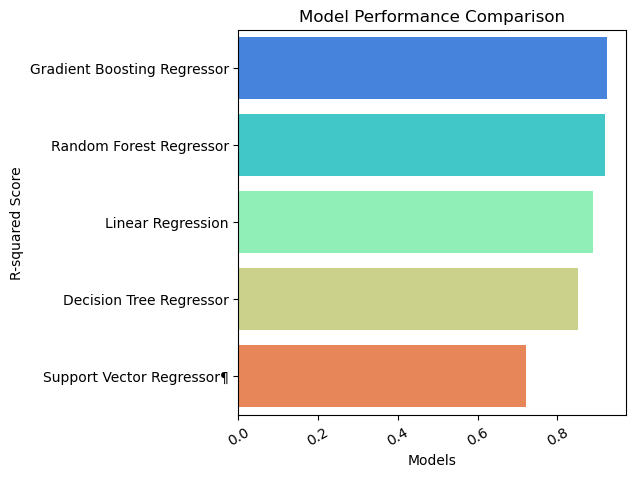

In [59]:
plt.figure(figsize=(5, 5))
sns.barplot(x=Results["R-squared"], y=Results["Model"], palette="rainbow")
plt.xticks(rotation=30)
plt.ylabel("R-squared Score")
plt.xlabel('Models')
plt.title("Model Performance Comparison")
plt.show()

From the result table "Gradient Boosting Regressor" is the best model with max "R-squared score" and minimum "Mean Squared Error (MSE)" and "Mean Absolute Error (MAE)" values."Random Forest Regressor" is also a good model which holds the second position with slight decrease in the "R-squared score " compared to Gradient Boosting Regressor.

Support Vector Regressor¶	 is thed worst model with very low "R-squared score " and hing error values.

### 4. Feature Importance Analysis (2 marks)
Identify the significant variables affecting car prices (feature selection)

In [62]:
# Extract feature importance-Gradient Boosting Regressor

feature_importance_gbreg = pd.DataFrame({
    "Feature_Gradient Boosting Regressor": X.columns,
    "Importance": gbreg.feature_importances_
    }).sort_values(by="Importance", ascending=False)

feature_importance_gbreg.head(10)

,Feature_Gradient Boosting Regressor,Importance
5,curbweight,0.430343
13,highwaympg,0.266518
6,enginesize,0.096255
10,horsepower,0.085808
2,carlength,0.025132
12,citympg,0.017875
3,carwidth,0.014527
11,peakrpm,0.011119
1,wheelbase,0.010959
31,cylindernumber_four,0.010854


C:\Users\anjan\AppData\Local\Temp\ipykernel_23876\701353178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature_Gradient Boosting Regressor", y="Importance", data=feature_importance_gbreg.head(10), palette="rainbow")


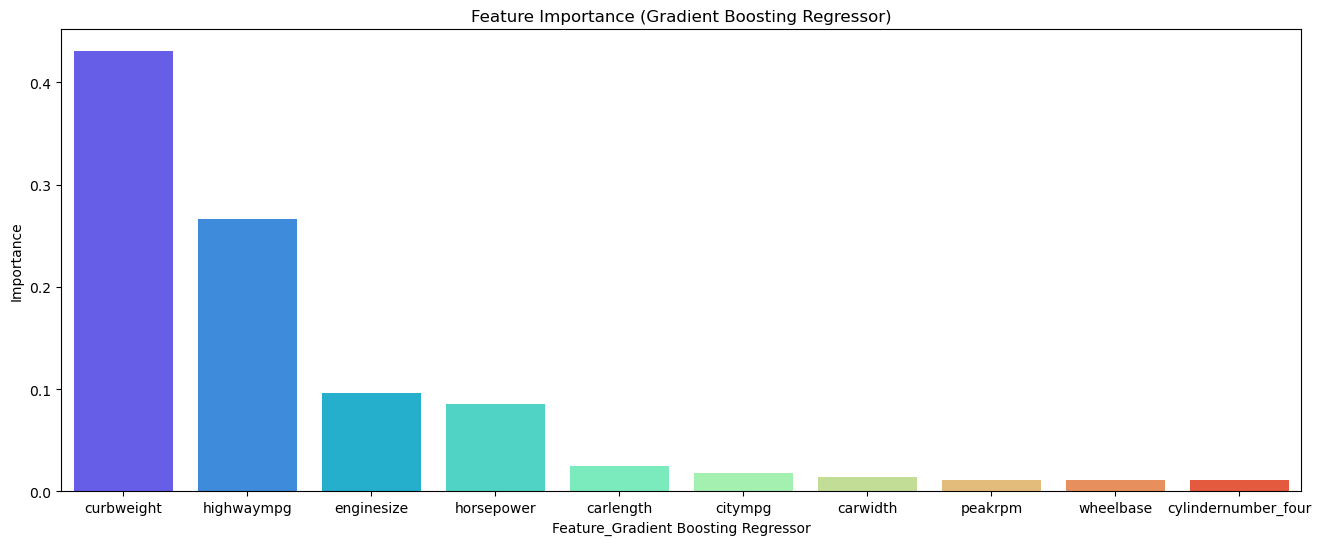

In [63]:
# Plot feature importance
plt.figure(figsize=(16,6))
sns.barplot(x="Feature_Gradient Boosting Regressor", y="Importance", data=feature_importance_gbreg.head(10), palette="rainbow")
plt.title("Feature Importance (Gradient Boosting Regressor)")
plt.show()

In [64]:
# Extract feature importance-Random Forest Regressor
feature_importance_rfreg = pd.DataFrame({
    "Feature_Random Forest Regressor": X.columns,
    "Importance": rfreg.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance_rfreg.head(10)

,Feature_Random Forest Regressor,Importance
5,curbweight,0.387210
13,highwaympg,0.298317
10,horsepower,0.111546
6,enginesize,0.100912
3,carwidth,0.018729
2,carlength,0.016958
12,citympg,0.012434
1,wheelbase,0.007604
7,boreratio,0.007315
11,peakrpm,0.006215


C:\Users\anjan\AppData\Local\Temp\ipykernel_23876\2510528298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature_Random Forest Regressor", y="Importance", data=feature_importance_rfreg.head(10), palette="coolwarm")


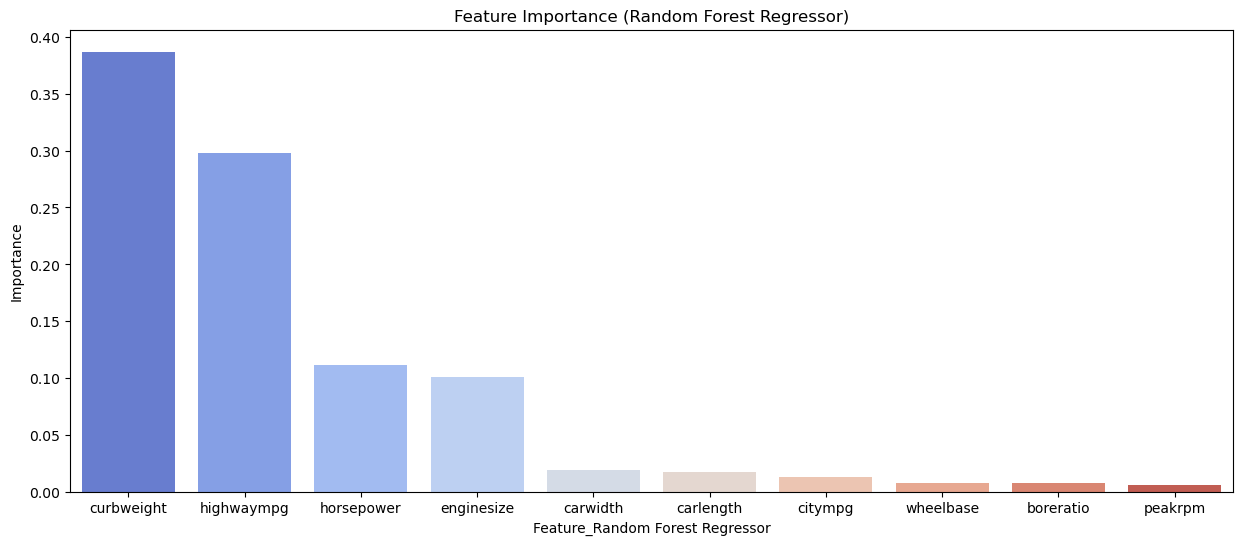

In [65]:
# Plot feature importance
plt.figure(figsize=(15,6))
sns.barplot(x="Feature_Random Forest Regressor", y="Importance", data=feature_importance_rfreg.head(10), palette="coolwarm")
plt.title("Feature Importance (Random Forest Regressor)")
plt.show()

curbweight is the most important feature. highwaympg and enginesize are in the second and third position respectively.

curbweight is the most important feature. highwaympg and enginesize are in the secon and third position respectively.

### 5. Hyperparameter Tuning (2 marks):
Perform hyperparameter tuning and check whether the performance of the model has increased.

In [69]:
from sklearn.model_selection import GridSearchCV
# Gradient Boosting Regressor
# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
best_gbmodel = grid_search.best_estimator_
y_pred_tuned = best_gbmodel.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [70]:
# Evaluate tuned model-Gradient Boosting Regressor
y_pred_tuned = best_gbmodel.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print("Tuned Model R² Score:", r2_score(y_test, y_pred_tuned))
print("Tuned Model MSE:", mean_squared_error(y_test, y_pred_tuned))
print("Tuned Model MAE:", mean_absolute_error(y_test,y_pred_tuned))

Tuned Model R² Score: 0.8906983492472451
Tuned Model MSE: 0.029811626120231798
Tuned Model MAE: 0.12159247508762405


In [71]:
# Random Forest Regressor
# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
best_rfmodel = grid_search.best_estimator_
y_pred_tuned = best_rfmodel.predict(X_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [72]:
# Evaluate tuned model-Random Forest Regressor
y_pred_tuned = best_rfmodel.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print("Tuned Model R² Score:", r2_score(y_test, y_pred_tuned))
print("Tuned Model MSE:", mean_squared_error(y_test, y_pred_tuned))
print("Tuned Model MAE:", mean_absolute_error(y_test,y_pred_tuned))

Tuned Model R² Score: 0.9200609448623359
Tuned Model MSE: 0.021803085385776497
Tuned Model MAE: 0.10813223511326212
